### TW3: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name

- xiaomei Xie
- Lili Hao


###  Simple Linear Regression example

Follow the code and observe the results

In [22]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [23]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

### Data Preparation

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [24]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [25]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [26]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

#### Load the data into a DataFrame

In [27]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#### Select the data and visualize it

In [28]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

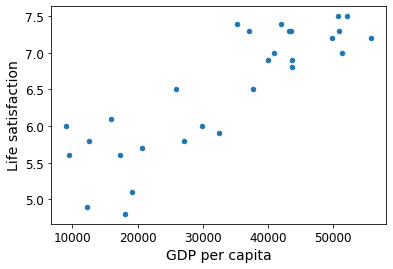

In [29]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [30]:
X.shape


(29, 1)

In [31]:
y.shape

(29, 1)

### Build a simple regression model


#### Create a simple linear regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [32]:
# import model
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model
model = LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X,y)


LinearRegression()

In [34]:
print(model.coef_)
print(model.intercept_)

[[4.91154459e-05]]
[4.8530528]


#### Predict y for a new X value

In [36]:
# Make a prediction for Cyprus 
# new data value 22587 for Cyprus's GDP per capita

X_new = [[22587]]

y_predict = model.predict(X_new)

y_predict

array([[5.96242338]])

#### Plot a scatter graph together with the regression function

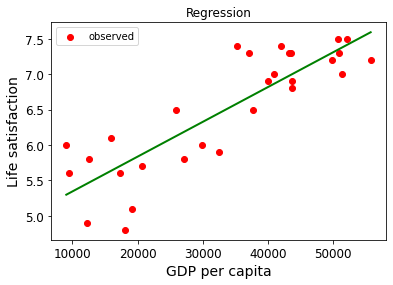

In [37]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')

# plot the regression function
plt.plot(X,model.predict(X),c='g',label='fitted',linewidth=2)

plt.show()

## Model evaluation metrics for regression models

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

See more details: https://scikit-learn.org/stable/modules/model_evaluation.html

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"

### Model Evaluation Example

#### 1. Preparing X and y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

See more details about Pandas Series and Numpy

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 2. Splitting X and y into training and testing sets

We are using the same data that is stored X, y above. 

In [38]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)




#### 3. Linear regression in scikit-learn

In [40]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg=LinearRegression()

# fit the model to the training data (learn the coefficients)

linreg.fit(X_train,y_train)


LinearRegression()

#### 4. Making predictions for testing data

Use X_test

In [42]:
# make predictions on the testing set
y_pred=linreg.predict(X_test)

y_pred



array([[6.59031623],
       [6.90629497],
       [6.82350342],
       [6.90057464],
       [7.24870458],
       [6.88774681],
       [5.42891846],
       [6.12434396],
       [7.19687366]])

In [44]:
print(linreg.score(X_train,y_train))  # training accuracy

0.71190057557096


In [47]:
print(linreg.score(X_test,y_test)) # test 

0.5844350680603301


#### 5. Computing the RMSE 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [50]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.39596209321120807

#### 6. K Cross Validation and Learning Curve

In [51]:
import statistics as st
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=3, random_state=None, shuffle=True)


##### Setting up a testbed using KFold 

In [53]:
# Let's create a new simple linear regressor
linreg=LinearRegression()

# Conduct 3-fold cross validation
rmse=[]
r2 =[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    r2.append(metrics.r2_score(y_test,y_pred))
    

print(rmse)
print(r2)

[0.5157665956208849, 0.3362458812480951, 0.5411380912606013]
[0.41714465127441425, 0.8228989776686904, 0.5831412102132423]


#### Learning Curve

Check the details for learning curve

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

[[0.16990234 0.19364887 0.30122586]
 [0.42621738 0.28844383 0.44958052]
 [0.36334853 0.33820653 0.44173821]
 [0.34276585 0.41401631 0.46736026]
 [0.33163815 0.39679634 0.48051858]]
[[1.51727096 0.49701501 0.48481511]
 [0.82440552 0.57975189 0.79189282]
 [0.89611638 0.5205446  0.90977025]
 [0.77699504 0.49737518 0.574914  ]
 [0.79521773 0.48117923 0.41216241]]


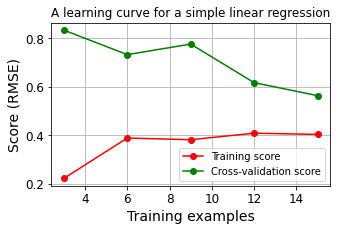

In [62]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2,0.8,5)  # 5 times 5*3 = 15

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                            train_sizes = train_sizes, 
                            scoring = 'neg_mean_squared_error',
                                                 cv=3, shuffle=True)
train_scores = np.sqrt(np.abs(train_mse))

test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores) 

train_scores_mean=np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)





# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()



### Teamwork


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(d) Draw a scatter plot of the data

(e) Display simple linear regression function with a scatter plot
    --> You will see the data does not follow a simple linear function. 
   
(f) Create a logistic regression function instead of a simple linear regression. See the web resources below:

    from sklearn.linear_model import LogisticRegression
    
This time draw a scatter plot of the data together with the logistic regression function. 

### Part 2: Write a summary of what you find from the data

### Submit your summary to Canvas